In [2]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_fr = pd.read_csv("the_office_lines_scripts.csv")
print(data_fr.head())
print(data_fr['speaker'].unique())

   id  season  episode  scene  \
0   1       1        1      1   
1   2       1        1      1   
2   3       1        1      1   
3   4       1        1      1   
4   5       1        1      1   

                                           line_text  speaker  deleted  
0  All right Jim. Your quarterlies look very good...  Michael    False  
1         Oh, I told you. I couldn't close it. So...      Jim    False  
2  So you've come to the master for guidance? Is ...  Michael    False  
3         Actually, you called me in here, but yeah.      Jim    False  
4    All right. Well, let me show you how it's done.  Michael    False  
['Michael' 'Jim' 'Pam' 'Dwight' 'Jan' 'Michel' 'Todd Packer' 'Phyllis'
 'Stanley' 'Oscar' 'Angela' 'Kevin' 'Ryan' 'Man' 'Roy'
 'Documentary Crew Member' 'Mr. Brown' 'Toby' 'Kelly' 'Meredith'
 'Travel Agent' 'Man on Phone' 'Everybody' 'Lonny' 'Darryl' 'Teammates'
 'Michael and Dwight' 'Warehouse worker' 'Madge' 'Worker' 'Packer'
 'Warehouse Worker' 'Katy' 'Guy a

Question 1 :How many characters are there? What are their names?
>Meanwhile performing the first unique selection by 'speaker' column in our data set, the amound of 793 unique fields for speakers although in my futher report I have decided to do filter the data frame and consider as characters only speakers with more than 100 lines, in order to avoid cases like 'Angela & Oscar' or some redundant data like in the image:
![](../Screenshot 2022-08-01 130254.png)

In [4]:
lines_per_character = data_fr.value_counts('speaker').to_frame()
lines_per_character.columns = ['nr_lines']
proper_char = lines_per_character.query("nr_lines >= 100")
character_names = list(proper_char.index)
print('There are', len(character_names), 'regular characters')
print('These are their names', character_names)

There are 31 regular characters
These are their names ['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Kevin', 'Angela', 'Oscar', 'Erin', 'Ryan', 'Darryl', 'Phyllis', 'Kelly', 'Jan', 'Toby', 'Stanley', 'Meredith', 'Holly', 'Nellie', 'Creed', 'Gabe', 'Robert', 'David', 'Karen', 'Clark', 'Roy', 'Charles', 'Pete', 'Jo', 'Deangelo', 'David Wallace']


Question 2:  For each character, find out who has the most lines across all episodes

The character with the most line is Michael
The amount of line per characters is:                nr_lines
speaker                
Michael           12140
Dwight             7531
Jim                6816
Pam                5376
Andy               3968
Kevin              1708
Angela             1695
Oscar              1490
Erin               1469
Ryan               1379
Darryl             1243
Phyllis            1071
Kelly               956
Jan                 949
Toby                936
Stanley             761
Meredith            645
Holly               608
Nellie              529
Creed               456
Gabe                436
Robert              430
David               382
Karen               341
Clark               260
Roy                 255
Charles             221
Pete                213
Jo                  194
Deangelo            171
David Wallace       108


<AxesSubplot:>

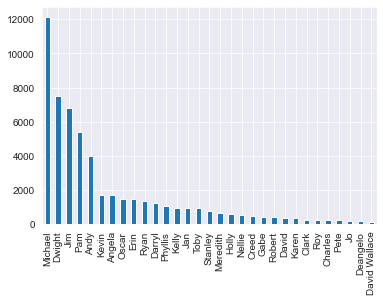

In [41]:
print('The character with the most line is', proper_char.index[0])
print('The amount of line per characters is:', proper_char)
data_fr['speaker'].value_counts().head(31).plot(kind='bar')

Question 3: What is the average of words per line for each character?

      name  average_words_per_line
0  Michael               15.034349
1   Dwight               12.310317
2      Jim                9.971244
3      Pam                9.567336
4     Andy               12.858367


[Text(0, 0, 'Michael'),
 Text(1, 0, 'Dwight'),
 Text(2, 0, 'Jim'),
 Text(3, 0, 'Pam'),
 Text(4, 0, 'Andy'),
 Text(5, 0, 'Kevin'),
 Text(6, 0, 'Angela'),
 Text(7, 0, 'Oscar'),
 Text(8, 0, 'Erin'),
 Text(9, 0, 'Ryan'),
 Text(10, 0, 'Darryl'),
 Text(11, 0, 'Phyllis'),
 Text(12, 0, 'Kelly'),
 Text(13, 0, 'Jan'),
 Text(14, 0, 'Toby'),
 Text(15, 0, 'Stanley'),
 Text(16, 0, 'Meredith'),
 Text(17, 0, 'Holly'),
 Text(18, 0, 'Nellie'),
 Text(19, 0, 'Creed'),
 Text(20, 0, 'Gabe'),
 Text(21, 0, 'Robert'),
 Text(22, 0, 'David'),
 Text(23, 0, 'Karen'),
 Text(24, 0, 'Clark'),
 Text(25, 0, 'Roy'),
 Text(26, 0, 'Charles'),
 Text(27, 0, 'Pete'),
 Text(28, 0, 'Jo'),
 Text(29, 0, 'Deangelo'),
 Text(30, 0, 'David Wallace')]

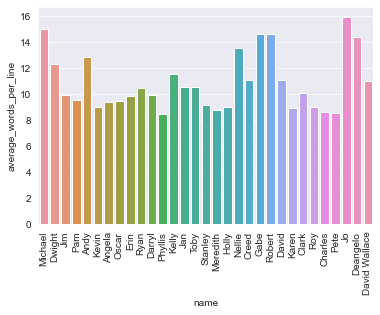

In [81]:
pd.options.mode.chained_assignment = None  # default='warn'
df = data_fr.loc[data_fr['speaker'].isin(character_names)]
# print(df.columns)
df['words'] = df.apply(lambda row: len(row['line_text'].split(" ")), axis=1)
#print(df.head())
speakers_df = pd.DataFrame({'name':character_names})
#print(speakers_df)
def calculateAvg(nameOfSpeaker):
    tmp = df.loc[df['speaker'] == nameOfSpeaker]
    average = tmp["words"].mean()
    return average
speakers_df['average_words_per_line'] = speakers_df.apply(lambda row: calculateAvg(row['name']),axis=1)
print(speakers_df.head())
characters=speakers_df['name']
ax = sns.barplot(data=speakers_df,x=characters, y='average_words_per_line')
ax.set_xticklabels(characters, rotation = 90)

Question 4: What is the most common word per character?

In [104]:
df_copy = df.copy(True)
df_copy.drop(['id', 'season','episode', 'scene', 'deleted','words'], axis=1, inplace=True)
df_copy['line_text'] = df_copy.groupby(['speaker'])['line_text'].transform(lambda x : ' '.join(x))
df_copy = df_copy.drop_duplicates().reset_index(drop=True)
print(df_copy.head())


                                           line_text  speaker
0  All right Jim. Your quarterlies look very good...  Michael
1  Oh, I told you. I couldn't close it. So... Act...      Jim
2  Well. I don't know. What? Uh, yeah. Just a fax...      Pam
3  [singing] Shall I play for you? Pa rum pump um...   Dwight
4  [on her cell phone] Just before lunch. That wo...      Jan


In [105]:
df_copy['list_of_words'] = df_copy['line_text'].transform(lambda  x: list(map(lambda it: clean_string(it), x.split(' '))))
#print(speakers_df.list_of_words[0])
print(df_copy.head())
def clean_string(word):
    to_lower = word.lower()
    regex = re.compile('[^a-zA-Z]')
    return regex.sub('',to_lower)

def most_common_word(list_of_words):
    list_df = pd.DataFrame({'word': list_of_words})
    return list_df.mode()
df_copy['most_commnon'] = df_copy.apply(lambda row: most_common_word(row['list_of_words']), axis=1)
speaker_common_word = df_copy.copy(True)
speaker_common_word.drop(['list_of_words', 'line_text'], axis=1, inplace=True)
print(speaker_common_word.head())

                                           line_text  speaker  \
0  All right Jim. Your quarterlies look very good...  Michael   
1  Oh, I told you. I couldn't close it. So... Act...      Jim   
2  Well. I don't know. What? Uh, yeah. Just a fax...      Pam   
3  [singing] Shall I play for you? Pa rum pump um...   Dwight   
4  [on her cell phone] Just before lunch. That wo...      Jan   

                                       list_of_words  
0  [all, right, jim, your, quarterlies, look, ver...  
1  [oh, i, told, you, i, couldnt, close, it, so, ...  
2  [well, i, dont, know, what, uh, yeah, just, a,...  
3  [singing, shall, i, play, for, you, pa, rum, p...  
4  [on, her, cell, phone, just, before, lunch, th...  
   speaker   most_commnon
0  Michael    word
0    i
1      Jim    word
0  you
2      Pam    word
0    i
3   Dwight    word
0  the
4      Jan    word
0  you
